# Weighted ECM clustering vs Traditional ECM clustering
### With IRIS (UCI dataset)

In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, plotting, calculate_non_specificity
import pandas as pd
from sklearn.metrics import adjusted_rand_score
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


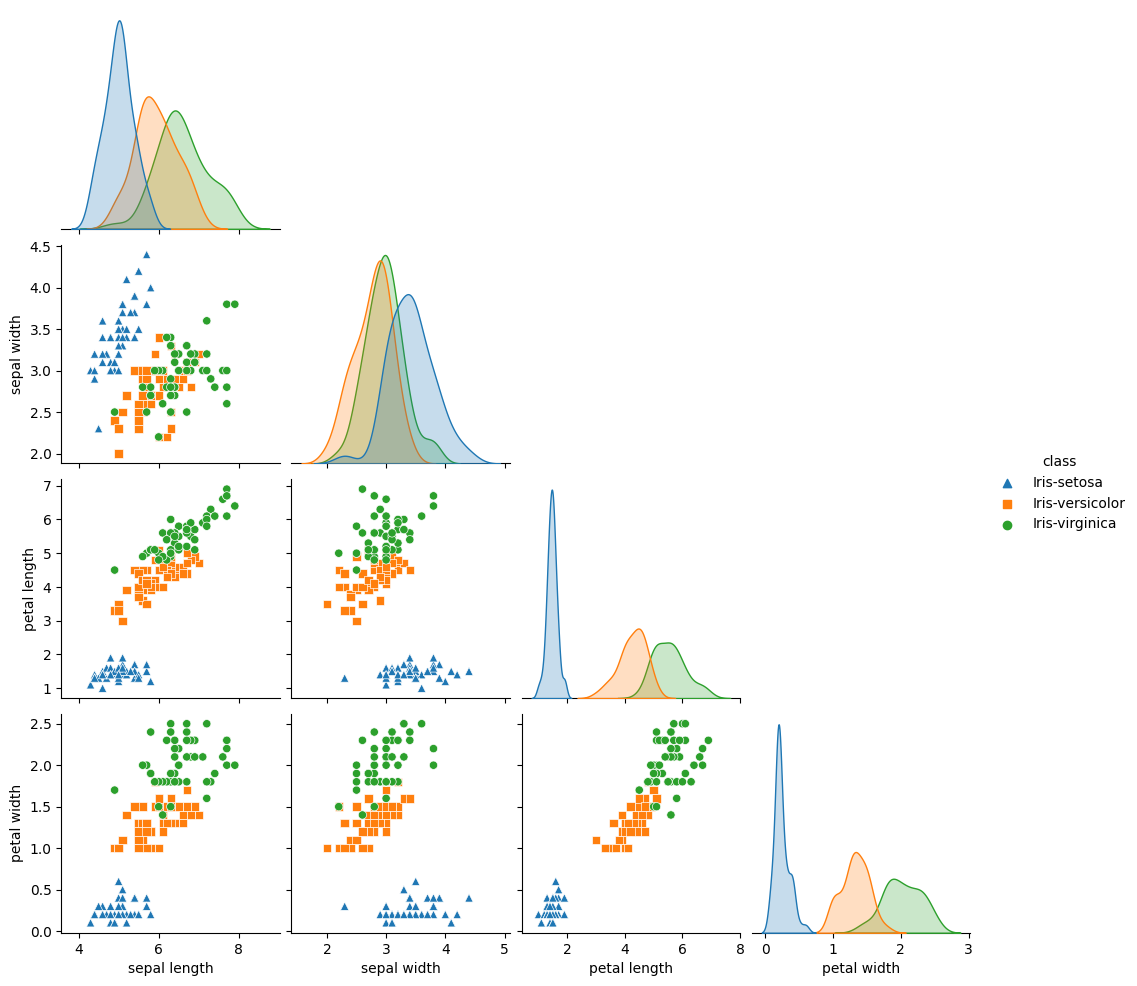

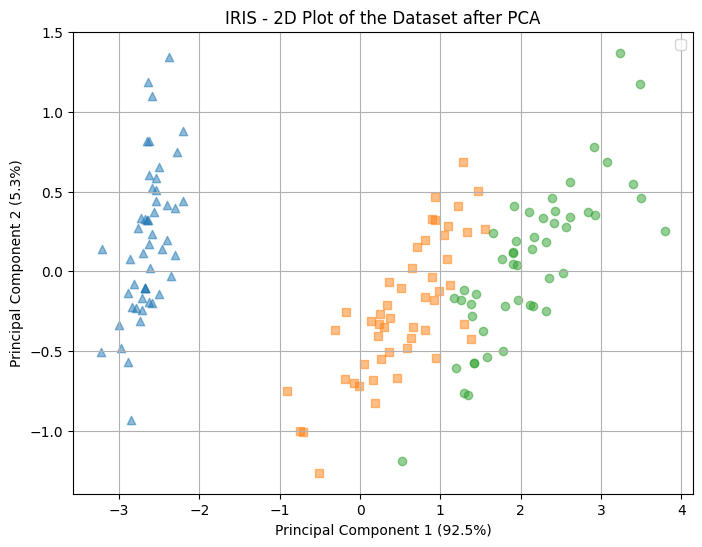

In [2]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="IRIS", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

[1, 3.54292165279678]
[2, 3.507929169010641]
[3, 3.500783480934679]
[4, 3.4978458161927035]
[5, 3.4961142655269937]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[0.         3.49422779 3.49422779]
[1, 3.54292165279678]
[2, 3.507929169010641]
[3, 3.500783480934679]
[4, 3.4978458161927035]
[5, 3.4961142655269937]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[1.         3.49422779 3.49422779]
[1, 3.54292165279678]
[2, 3.5079291690106413]
[3, 3.5007834809346794]
[4, 3.4978458161927035]
[5, 3.496114265526994]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[2.         3.49422779 3.49422779]
[1, 3.54292165279678]
[2, 3.507929169010641]
[3, 3.500783480934679]
[4, 3.4978458161927035]
[5, 3.4961142655269937]
[6, 3.4949799137722373]
[7, 3.4942277945449276]
[3.         3.49422779 3.49422779]
[1, 3.54292165279678]
[2, 3.507929169010641]
[3, 3.500783480934679]
[4, 3.4978458161927035]
[5, 3.496114265526994]
[6, 3.494979913772237]
[7, 3.4942277945449267]
[4.         3.49422779 3.49422779]
[1, 3.

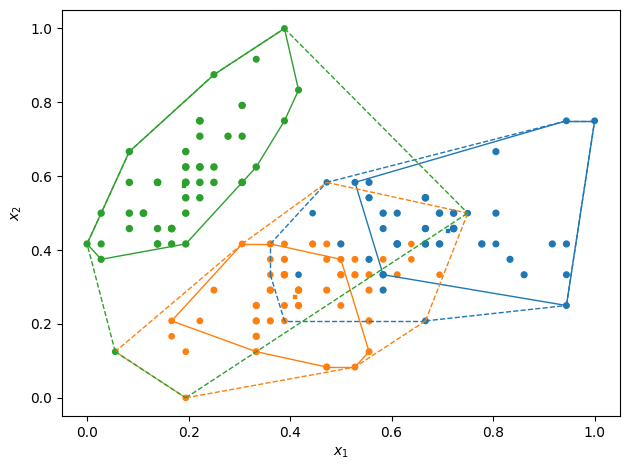

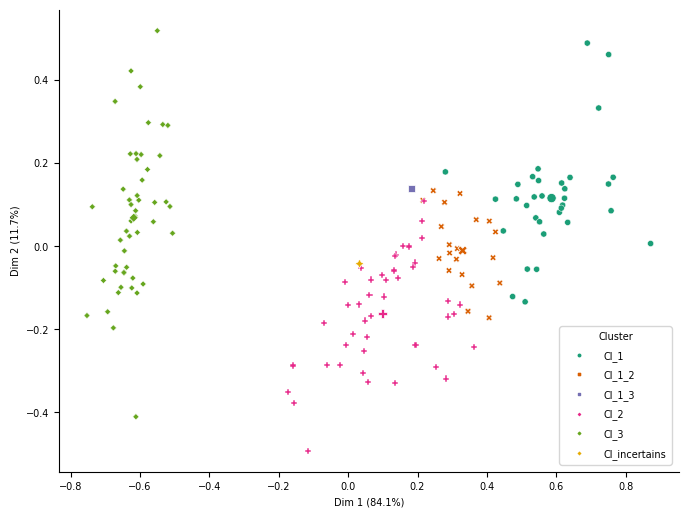

In [3]:
# Traditional ECM clustering
delta = np.sqrt(20)
model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)


ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)


## Weighted ECM (WECM)

In [14]:
# Weighted ECM clustering
model_list = np.array([])
for i in range(30):
    W = None
    g0 = None
    c = 3
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, g0=g0, W=W, beta=2, alpha=1, delta=delta, epsi=1e-5, ntrials=10)
    model_list = np.append(model_list, model)

# Get best 10 models with minimum values
num = 10
model_list = sorted(model_list, key=lambda x : x['crit'])
print([x['crit'] for x in model_list])
top_weights = [model['W'] for model in model_list[:num]]

# Get ARI values of top 10
true_labels = numeric_labels
predicted_labels_list = [np.argmax(model['betp'], axis=1) for model in model_list[:num]]
top_aris = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]
print(f"ARIs: {top_aris}")

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list[:num]]
print(f"Non-specificities: {top_NS}")


Initial weights: 
 [[0.38792262 0.17119232 0.22253199 0.21835307]
 [0.25851684 0.25069786 0.01914994 0.47163536]
 [0.20588022 0.02270249 0.02148891 0.74992838]]
---------Iteration #1---------
Initial prototypes: 
 [[0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]]
[1, 0.22894507106075002]
[2, 0.21841135567348993]
[3, 0.2059594485911301]
[4, 0.20506345342415339]
[5, 0.2046961461602015]
[6, 0.20446758250352834]
[7, 0.20428852282946242]
[8, 0.2041440326913139]
[9, 0.204028538170559]
[10, 0.20393739148750084]
[11, 0.20386627563407222]
[12, 0.20381133231571974]
[13, 0.20376925359565312]
[14, 0.2037372843715064]
[15, 0.20371317557519905]
[16, 0.20369511935536855]
[17, 0.2036816816743201]
[18, 0.20367173875274422]
[0.         0.20367174 0.20367174]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.70726496 0.4508547

In [15]:
best_model = model_list[0]
print("----------Weighted ECM----------")
print(f"Jbest: {best_model['crit']}")
print(f"Centers: \n{best_model['g']}")
print(f"Weights: \n{best_model['W']}")
print(f"Adjusted Rand Index (ARI) of the best J: {top_aris[0]}")
print(f"Average ARI: {np.mean(top_aris)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")

----------Weighted ECM----------
Jbest: 0.1480921619056182
Centers: 
[[0.14154367 0.55760456 0.08278536 0.0585921 ]
 [0.3578222  0.33037055 0.66305579 0.71149066]
 [0.86521037 0.37218666 0.90583478 0.84665151]]
Weights: 
[[0.08544612 0.12682216 0.41655836 0.37117336]
 [0.00856094 0.10441695 0.83618045 0.05084166]
 [0.34198066 0.08777485 0.42117707 0.14906742]]
Adjusted Rand Index (ARI) of the best J: 0.3793341124996254
Average ARI: 0.5035438528153195
Average Non-specificity: 1.6385586851981906


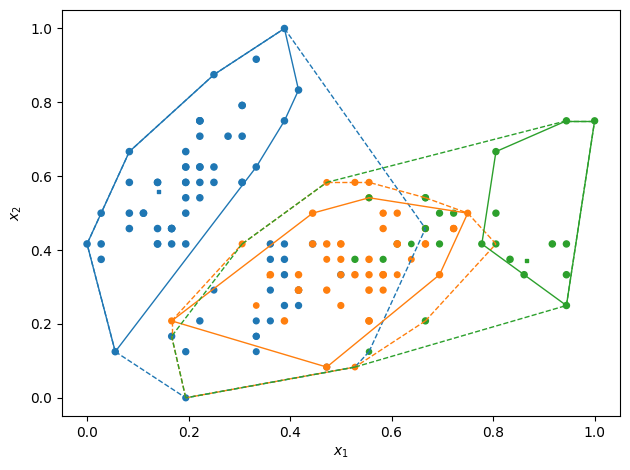

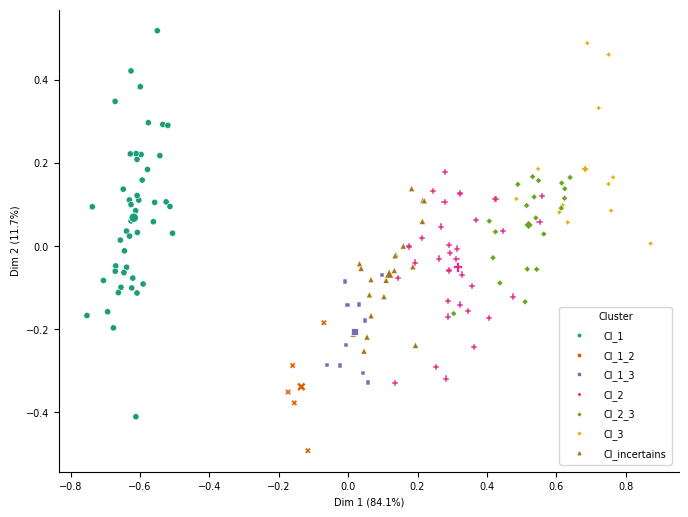

In [16]:
# Plotting PCA of the best model
ev_plot(best_model, X=X, cex=20)
ev_pcaplot(data=X, x=best_model, normalize=False, cex=20)

In [17]:
for W in top_weights:
    print(f"\n{W}")
     


[[0.08544612 0.12682216 0.41655836 0.37117336]
 [0.00856094 0.10441695 0.83618045 0.05084166]
 [0.34198066 0.08777485 0.42117707 0.14906742]]

[[0.049597   0.22836718 0.5134888  0.20854702]
 [0.09275868 0.0549495  0.54431487 0.30797695]
 [0.15857232 0.23626678 0.12545499 0.47970591]]

[[0.35048151 0.10330647 0.05292128 0.49329074]
 [0.13985795 0.24112827 0.4975506  0.12146317]
 [0.15271495 0.06950548 0.41521256 0.36256702]]

[[0.08196874 0.41249246 0.21923765 0.28630115]
 [0.10627304 0.07437862 0.17024525 0.64910309]
 [0.13389591 0.32594931 0.35168607 0.18846871]]

[[0.20878657 0.0876628  0.65370717 0.04984346]
 [0.30313677 0.22670969 0.43209775 0.0380558 ]
 [0.12317037 0.3291928  0.2982862  0.24935063]]

[[0.16831957 0.19481284 0.58434482 0.05252278]
 [0.36613604 0.19534415 0.3602898  0.07823001]
 [0.1841306  0.12798438 0.1801031  0.50778192]]

[[0.27653119 0.51289581 0.08601416 0.12455884]
 [0.36179162 0.12990896 0.33889893 0.16940049]
 [0.0999888  0.0895706  0.6861251  0.1243155 ]]

## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)